# Multi-Drug Response Prediction using Gene Expression (GDSC Style)

In [13]:
# Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [14]:
# Simulate gene expression data (1000 samples x 1000 genes)
np.random.seed(42)
n_samples = 1000
n_genes = 1000
gene_data = np.random.randn(n_samples, n_genes)
gene_names = [f'Gene_{i+1}' for i in range(n_genes)]
df_genes = pd.DataFrame(gene_data, columns=gene_names)

In [15]:
# Simulate drug response for 3 drugs (multi-class)
# Drug names: Erlotinib, Cisplatin, Tamoxifen
true_weights = np.random.randn(n_genes, 3)
scores = df_genes.values @ true_weights
labels = np.argmax(scores + np.random.normal(0, 0.5, scores.shape), axis=1)
df_genes['drug_response'] = labels

In [16]:
# Map numeric labels to actual drug names
drug_map = {0: 'Erlotinib', 1: 'Cisplatin', 2: 'Tamoxifen'}
df_genes['drug_response'] = df_genes['drug_response'].map(drug_map)
df_genes['drug_response'].value_counts()

drug_response
Erlotinib    340
Cisplatin    335
Tamoxifen    325
Name: count, dtype: int64

In [17]:
# Split data
X = df_genes.drop(columns=['drug_response'])
y = df_genes['drug_response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize gene expression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Cisplatin       0.35      0.53      0.42        55
   Erlotinib       0.50      0.44      0.47        78
   Tamoxifen       0.47      0.34      0.40        67

    accuracy                           0.43       200
   macro avg       0.44      0.44      0.43       200
weighted avg       0.45      0.43      0.43       200



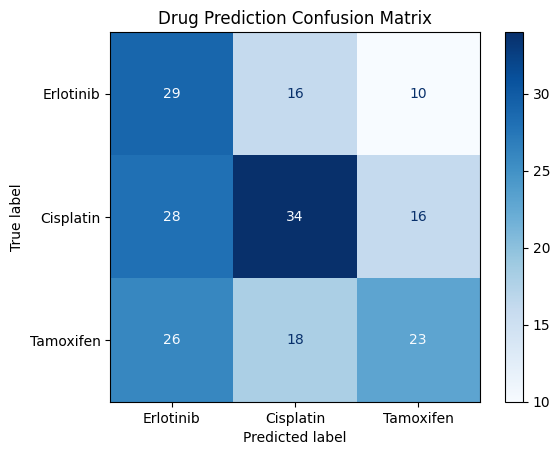

In [20]:
# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test,
                                             display_labels=list(drug_map.values()),
                                             cmap='Blues')
plt.title('Drug Prediction Confusion Matrix')
plt.show()